C:\Users\Ekrem Acar\AppData\Local\Temp\ipykernel_29332\1926706705.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="lab_type", y="replacements_next_month", estimator=np.mean, ci=None)


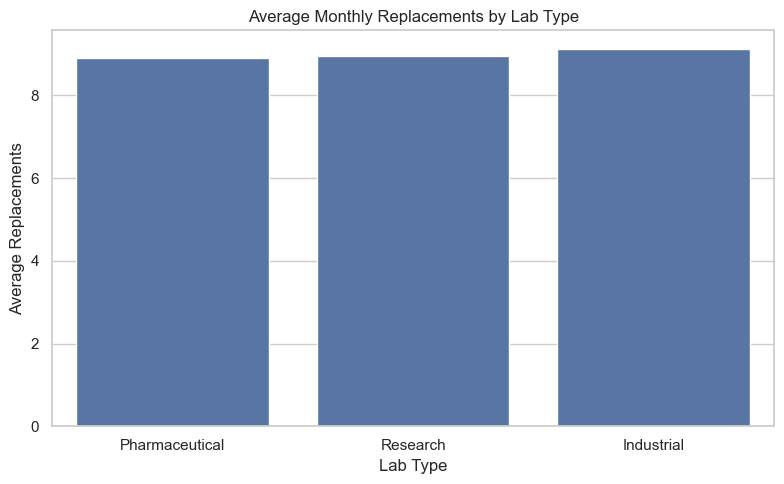

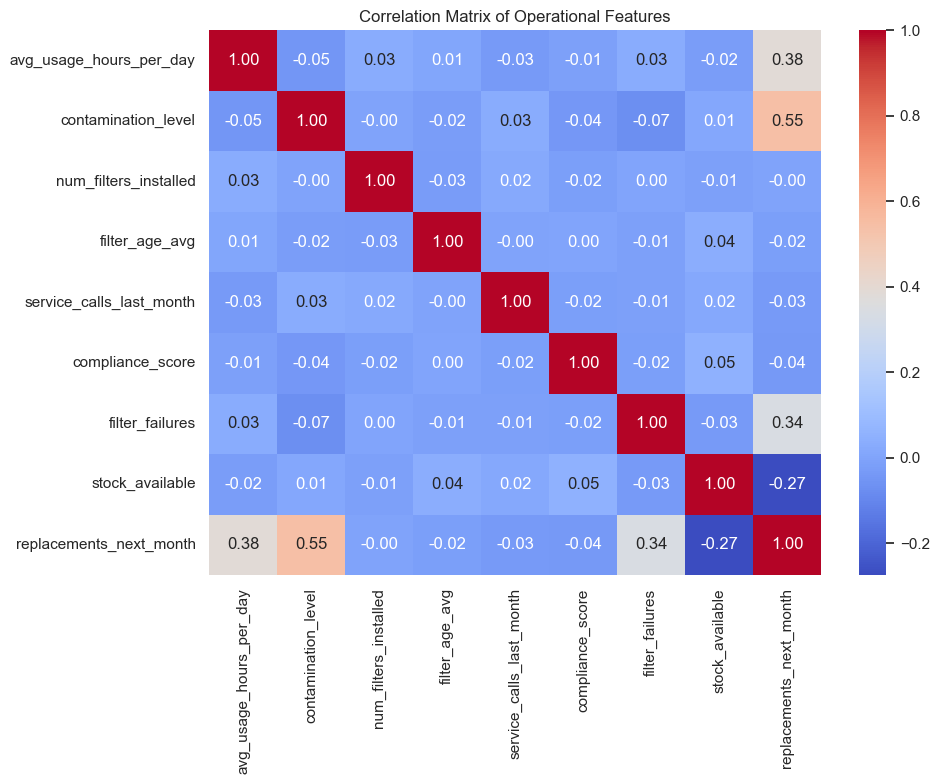

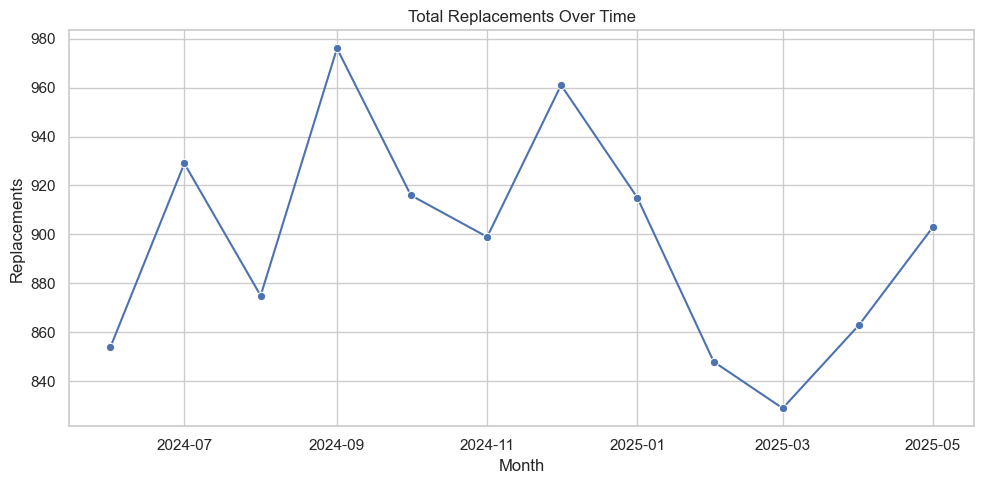

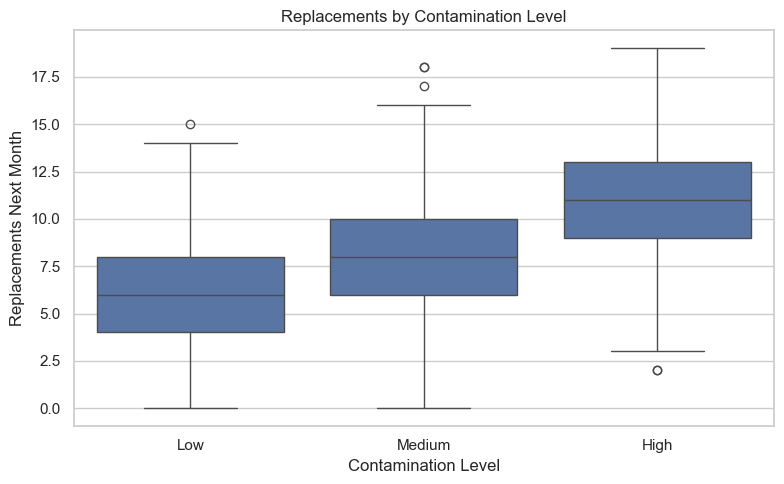

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("simulated_lab_filter_data.csv")
df['month'] = pd.to_datetime(df['month'])

# Set style
sns.set(style="whitegrid")

# 1. Average replacements by lab type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="lab_type", y="replacements_next_month", estimator=np.mean, ci=None)
plt.title("Average Monthly Replacements by Lab Type")
plt.ylabel("Average Replacements")
plt.xlabel("Lab Type")
plt.tight_layout()
plt.show()

# 2. Correlation matrix of numeric features
numeric_features = df.select_dtypes(include='number')
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Operational Features")
plt.tight_layout()
plt.show()

# 3. Total replacements over time
monthly_replacements = df.groupby("month")["replacements_next_month"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_replacements, x="month", y="replacements_next_month", marker="o")
plt.title("Total Replacements Over Time")
plt.ylabel("Replacements")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# 4. Boxplot of contamination vs replacements
df['contamination_bracket'] = pd.cut(df['contamination_level'], bins=[0, 0.3, 0.6, 1.0], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="contamination_bracket", y="replacements_next_month")
plt.title("Replacements by Contamination Level")
plt.xlabel("Contamination Level")
plt.ylabel("Replacements Next Month")
plt.tight_layout()
plt.show()
